<a href="https://colab.research.google.com/github/693080593/research/blob/master/3_Sets_Polynomial(Tricomponent)_Modified_Dataset_x2_122020_%5B4%5D_cHB_XgBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
data = pd.read_csv('/content/Feed Effect on Biocrude Yield Data ML 080620 Polynomial Cheng 2021 Modified (Tricomponent) x2 122020.csv')
Original_Oil_Yields = data['Bio-crude Oil Yield']
Original_Features = data.drop('Bio-crude Oil Yield', axis = 1)

# Success
print ("Bio-crude dataset has {} data points with {} variables each.".format(*data.shape))
data.shape

data[:240:30]


Bio-crude dataset has 450 data points with 32 variables each.


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,ProHemi,ProCarb,ProAsh,CellCarb,CellLig,HemiCarb,HemiLig,CarbLig,LigAsh,ProCellCarb,ProCellLig,ProCellAsh,ProHemiLig,ProCarbLig,ProCarbAsh,ProLigAsh,CellCarbLig,CellLigAsh,HemiCarbAsh,LipProLig,LipProAsh,LipCellLig,LipCellAsh,LipCarbLig,Bio-crude Oil Yield
0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000,0.0000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,85.50
30,30.9,27.3,0.0,0.0,32.7,0.0,9.1,0.0,8.9271,2.4843,0.000,0.0000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.812366,0.0,0.0,0.0,0.0,0.0,0.767649,0.0,0.0,0.0,41.00
60,13.3,25.5,0.0,0.0,38.7,0.0,0.0,0.0,9.8685,0.0000,0.000,0.0000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,27.10
90,6.5,65.2,0.0,0.0,20.7,0.0,8.0,0.0,13.4964,5.2160,0.000,0.0000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.079712,0.0,0.0,0.0,0.0,0.0,0.339040,0.0,0.0,0.0,38.00
120,1.9,23.4,66.4,0.0,8.0,0.0,0.0,0.0,1.8720,0.0000,5.312,0.0000,0.0,0.0000,0.0,0.0,1.243008,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,23.60
150,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0000,0.0000,0.000,0.0000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.30
180,0.0,0.0,39.2,35.1,0.0,20.2,0.0,0.0,0.0000,0.0000,0.000,7.9184,0.0,7.0902,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,26.98
210,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000,0.0000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,6.50


In [ ]:
#import random
#index = [i for i in range(len(data))] 
#random.shuffle(index)
#data = data.loc[index] 
#data = data.drop('random', axis = 1)
#data.shape
#data[:240:30]

In [ ]:
#Oil_Yields = data['Bio-crude Oil Yield']
#Features = data.drop('Bio-crude Oil Yield', axis = 1)
#print(Oil_Yields)
#print(Features)

In [46]:
import numpy as np
# The mean relative error (MRE) is commonly used to measure the predictive accuracy of models.

def performance_metric(y_true, y_predict):
  """Calculates and returns the performance score between 
        true and predicted values based on the metric chosen."""
  # TODO: Calculate the performance score between 'y_true' and 'y_predict'

  return np.mean(np.abs(y_true-y_predict))/np.mean(y_true)

In [ ]:
for i in range(2,11,1):

  # TODO: Import 'XGBRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  from sklearn.model_selection import train_test_split

  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 69)
  data['random'] = np.random.random(size = len(data))
  
  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.18)

  # Lets split the data into i folds.  
  kf =KFold(n_splits=i, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    model = XGBRegressor(silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  # Predict validation set
  y_valid_predict = model.predict(X_valid)
  
  MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
  y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
  r2_valid = metrics.r2_score(y_valid, y_valid_predict)
  MRE_valid = performance_metric(y_valid, y_valid_predict)

  SD = ((np.mean(r2_train_all)-np.mean(r2_test_all))**2+(np.mean(r2_train_all)-r2_valid)**2+(r2_valid-np.mean(r2_test_all))**2)**0.5

  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Optimal model has R2 score of valid set", r2_valid)
  print(SD)

In [ ]:
for i in range(1,35,1):

  # TODO: Import 'XGBRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  from sklearn.model_selection import train_test_split

  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 69)
  data['random'] = np.random.random(size = len(data))
  
  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = i/100)

  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    model = XGBRegressor(silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  # Predict validation set
  y_valid_predict = model.predict(X_valid)
  
  MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
  y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
  r2_valid = metrics.r2_score(y_valid, y_valid_predict)
  MRE_valid = performance_metric(y_valid, y_valid_predict)

  SD = ((np.mean(r2_train_all)-np.mean(r2_test_all))**2+(np.mean(r2_train_all)-r2_valid)**2+(r2_valid-np.mean(r2_test_all))**2)**0.5

  print(i/100)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Optimal model has R2 score of valid set", r2_valid)
  print(SD)

In [ ]:
for i in range(0,101,1):

  # TODO: Import 'XGBRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  from sklearn.model_selection import train_test_split

  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = i)
  data['random'] = np.random.random(size = len(data))
  
  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.11)

  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    model = XGBRegressor(silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  # Predict validation set
  y_valid_predict = model.predict(X_valid)
  
  MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
  y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
  r2_valid = metrics.r2_score(y_valid, y_valid_predict)
  MRE_valid = performance_metric(y_valid, y_valid_predict)

  SD = ((np.mean(r2_train_all)-np.mean(r2_test_all))**2+(np.mean(r2_train_all)-r2_valid)**2+(r2_valid-np.mean(r2_test_all))**2)**0.5

  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Optimal model has R2 score of valid set", r2_valid)
  print(SD)

In [ ]:
# TODO: Import 'RandomForestRegressor'
from xgboost import XGBRegressor

# TODO: Import 'KFold'
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 69)
data['random'] = np.random.random(size = len(data))

# TODO: Shuffle and split the data into training and testing subsets
Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.11)

# Lets split the data into 5 folds.  
kf =KFold(n_splits=5, shuffle=True)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    model = XGBRegressor(silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)
    
    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1
    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

# print(len(np.concatenate(y_test_list, axis=0)))
# print(len(np.concatenate(y_pred_list, axis=0)))

print("")
# Predict validation set
y_valid_predict = model.predict(X_valid)

MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
r2_valid = metrics.r2_score(y_valid, y_valid_predict)
MRE_valid = performance_metric(y_valid, y_valid_predict)

print("Optimal model has MAE of valid set:", MAE_valid)
print("Optimal model has RMSE of valid set:", y_valid_rmse)
  print("Optimal model has R2 score of valid set", r2_valid)
print("Optimal model has MRE of valid set:", MRE_valid)

Text(0.5, 1.0, 'y_pred vs. y_true')

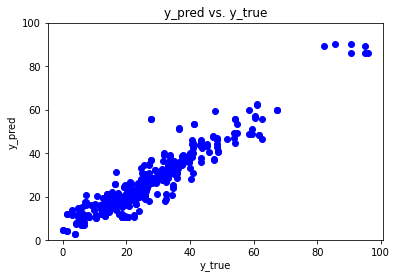

In [25]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_XGBoost.csv', index = False, header=True)

<Figure size 2880x1440 with 0 Axes>

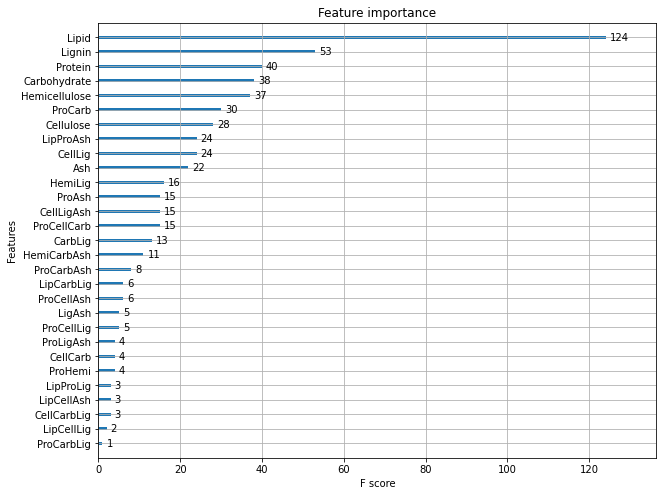

In [27]:
from xgboost import plot_importance
from matplotlib import pyplot as plt

#plot_importance(model)

plt.figure(figsize=(40,20))
plot_importance(model,max_num_features=100)
plt.rcParams["figure.figsize"] = (10,8)

plt.show()

Text(0.5, 1.0, 'y_pred vs. y_true')

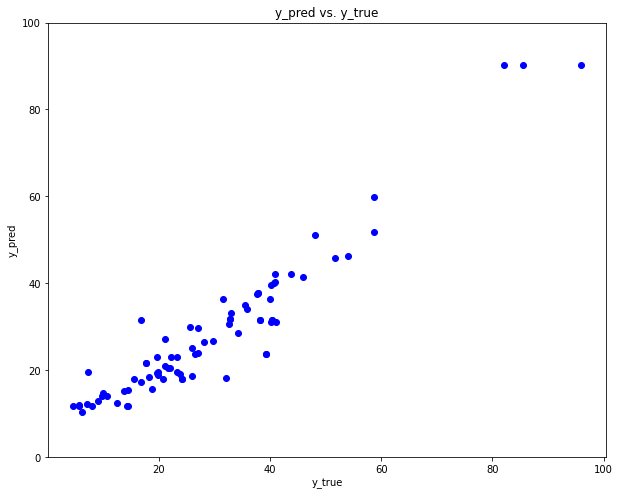

In [34]:
import matplotlib.pyplot as py
py.plot(y_valid, y_valid_predict, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
# n_estimators 参数的最佳取值(10, 110, 11)

for i in range(10, 150, 10):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 69)
  data['random'] = np.random.random(size = len(data))

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.11)
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': i, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)

  # Predict validation set
  y_valid_predict = model.predict(X_valid)
  
  MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
  y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
  r2_valid = metrics.r2_score(y_valid, y_valid_predict)
  MRE_valid = performance_metric(y_valid, y_valid_predict)

  SD = ((np.mean(r2_train_all)-np.mean(r2_test_all))**2+(np.mean(r2_train_all)-r2_valid)**2+(r2_valid-np.mean(r2_test_all))**2)**0.5

  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Optimal model has R2 score of valid set", r2_valid)
  print(SD)

In [ ]:
# max_depth 参数的最佳取值(1, 10, 10)

for i in range(1, 16, 1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 69)
  data['random'] = np.random.random(size = len(data))

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.11)
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 130, 'gamma': 0, 'max_depth': i, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)

  # Predict validation set
  y_valid_predict = model.predict(X_valid)
  
  MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
  y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
  r2_valid = metrics.r2_score(y_valid, y_valid_predict)
  MRE_valid = performance_metric(y_valid, y_valid_predict)

  SD = ((np.mean(r2_train_all)-np.mean(r2_test_all))**2+(np.mean(r2_train_all)-r2_valid)**2+(r2_valid-np.mean(r2_test_all))**2)**0.5

  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Optimal model has R2 score of valid set", r2_valid)
  print(SD)

In [ ]:
# min_child_weight 参数的最佳取值(0, 1, 10)

for i in range(0,11,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 69)
  data['random'] = np.random.random(size = len(data))

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.11)
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 130, 'gamma': 0, 'max_depth': 6, 'min_child_weight': i/10,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)

  # Predict validation set
  y_valid_predict = model.predict(X_valid)
  
  MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
  y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
  r2_valid = metrics.r2_score(y_valid, y_valid_predict)
  MRE_valid = performance_metric(y_valid, y_valid_predict)

  SD = ((np.mean(r2_train_all)-np.mean(r2_test_all))**2+(np.mean(r2_train_all)-r2_valid)**2+(r2_valid-np.mean(r2_test_all))**2)**0.5

  print(i/10)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Optimal model has R2 score of valid set", r2_valid)
  print(SD)

In [ ]:
# gamma 参数的最佳取值(0, 0.1, 11)

for i in range(0,11,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 69)
  data['random'] = np.random.random(size = len(data))

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.11)
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 130, 'gamma': i/100, 'max_depth': 6, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)

  # Predict validation set
  y_valid_predict = model.predict(X_valid)
  
  MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
  y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
  r2_valid = metrics.r2_score(y_valid, y_valid_predict)
  MRE_valid = performance_metric(y_valid, y_valid_predict)

  SD = ((np.mean(r2_train_all)-np.mean(r2_test_all))**2+(np.mean(r2_train_all)-r2_valid)**2+(r2_valid-np.mean(r2_test_all))**2)**0.5

  print(i/100)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Optimal model has R2 score of valid set", r2_valid)
  print(SD)

In [ ]:
# subsample 参数的最佳取值(0, 1, 11)

for i in range(3190,3210,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 69)
  data['random'] = np.random.random(size = len(data))

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.11)
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 130, 'gamma': 0, 'max_depth': 6, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': i/10000, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)

  # Predict validation set
  y_valid_predict = model.predict(X_valid)
  
  MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
  y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
  r2_valid = metrics.r2_score(y_valid, y_valid_predict)
  MRE_valid = performance_metric(y_valid, y_valid_predict)

  SD = ((np.mean(r2_train_all)-np.mean(r2_test_all))**2+(np.mean(r2_train_all)-r2_valid)**2+(r2_valid-np.mean(r2_test_all))**2)**0.5

  print(i/10000)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Optimal model has R2 score of valid set", r2_valid)
  print(SD)

In [ ]:
# colsample_bytree 参数的最佳取值(0, 1, 11)

for i in range(0,101,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 69)
  data['random'] = np.random.random(size = len(data))

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.11)
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 130, 'gamma': 0, 'max_depth': 6, 'min_child_weight': 1,
                'colsample_bytree': i/100, 'colsample_bylevel': 1, 'subsample': 0.3192, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)

  # Predict validation set
  y_valid_predict = model.predict(X_valid)
  
  MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
  y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
  r2_valid = metrics.r2_score(y_valid, y_valid_predict)
  MRE_valid = performance_metric(y_valid, y_valid_predict)

  SD = ((np.mean(r2_train_all)-np.mean(r2_test_all))**2+(np.mean(r2_train_all)-r2_valid)**2+(r2_valid-np.mean(r2_test_all))**2)**0.5

  print(i/100)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Optimal model has R2 score of valid set", r2_valid)
  print(SD)

In [ ]:
# reg_lambda 参数的最佳取值(0, 1, 11)

for i in range(170,200,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 69)
  data['random'] = np.random.random(size = len(data))

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.11)
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 130, 'gamma': 0, 'max_depth': 6, 'min_child_weight': 1,
                'colsample_bytree': 0.86, 'colsample_bylevel': 1, 'subsample': 0.3192, 'reg_lambda': i/10000, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)

  # Predict validation set
  y_valid_predict = model.predict(X_valid)
  
  MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
  y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
  r2_valid = metrics.r2_score(y_valid, y_valid_predict)
  MRE_valid = performance_metric(y_valid, y_valid_predict)

  SD = ((np.mean(r2_train_all)-np.mean(r2_test_all))**2+(np.mean(r2_train_all)-r2_valid)**2+(r2_valid-np.mean(r2_test_all))**2)**0.5

  print(i/10000)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Optimal model has R2 score of valid set", r2_valid)
  print(SD)

In [ ]:
# reg_alpha 参数的最佳取值(0, 1, 11)

for i in range(0,110,10):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 69)
  data['random'] = np.random.random(size = len(data))

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.11)
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 130, 'gamma': 0, 'max_depth': 6, 'min_child_weight': 1,
                'colsample_bytree': 0.86, 'colsample_bylevel': 1, 'subsample': 0.3192, 'reg_lambda': 0.0173, 'reg_alpha': i/10000,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)

  # Predict validation set
  y_valid_predict = model.predict(X_valid)
  
  MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
  y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
  r2_valid = metrics.r2_score(y_valid, y_valid_predict)
  MRE_valid = performance_metric(y_valid, y_valid_predict)

  SD = ((np.mean(r2_train_all)-np.mean(r2_test_all))**2+(np.mean(r2_train_all)-r2_valid)**2+(r2_valid-np.mean(r2_test_all))**2)**0.5

  print(i/10000)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Optimal model has R2 score of valid set", r2_valid)
  print(SD)

In [ ]:
# eta 参数的最佳取值(-2, 0, 10)

for i in range(0,10,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 69)
  data['random'] = np.random.random(size = len(data))

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.11)
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    other_params = {'eta': i/100, 'n_estimators': 130, 'gamma': 0, 'max_depth': 6, 'min_child_weight': 1,
                'colsample_bytree': 0.86, 'colsample_bylevel': 1, 'subsample': 0.3192, 'reg_lambda': 0.0173, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)

  # Predict validation set
  y_valid_predict = model.predict(X_valid)
  
  MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
  y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
  r2_valid = metrics.r2_score(y_valid, y_valid_predict)
  MRE_valid = performance_metric(y_valid, y_valid_predict)

  SD = ((np.mean(r2_train_all)-np.mean(r2_test_all))**2+(np.mean(r2_train_all)-r2_valid)**2+(r2_valid-np.mean(r2_test_all))**2)**0.5

  print(i/100)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Optimal model has R2 score of valid set", r2_valid)
  print(SD)

In [ ]:
# seed 参数的最佳取值(0, 100, 1)

for i in range(0,101,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 69)
  data['random'] = np.random.random(size = len(data))

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.11)
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 130, 'gamma': 0, 'max_depth': 6, 'min_child_weight': 1,
                'colsample_bytree': 0.86, 'colsample_bylevel': 1, 'subsample': 0.3192, 'reg_lambda': 0.0173, 'reg_alpha': 0,
                'seed': i}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)

  # Predict validation set
  y_valid_predict = model.predict(X_valid)
  
  MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
  y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
  r2_valid = metrics.r2_score(y_valid, y_valid_predict)
  MRE_valid = performance_metric(y_valid, y_valid_predict)

  SD = ((np.mean(r2_train_all)-np.mean(r2_test_all))**2+(np.mean(r2_train_all)-r2_valid)**2+(r2_valid-np.mean(r2_test_all))**2)**0.5

  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Optimal model has R2 score of valid set", r2_valid)
  print(SD)

In [69]:
# TODO: Import 'RandomForestRegressor'
from xgboost import XGBRegressor

# TODO: Import 'KFold'
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 69)
data['random'] = np.random.random(size = len(data))

# TODO: Shuffle and split the data into training and testing subsets
Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.11)

# Lets split the data into 10 folds.  
kf =KFold(n_splits=5, shuffle=True)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 130, 'gamma': 0, 'max_depth': 6, 'min_child_weight': 1,
                'colsample_bytree': 0.86, 'colsample_bylevel': 1, 'subsample': 0.3192, 'reg_lambda': 0.0173, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)
    
    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1
    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

# print(len(np.concatenate(y_test_list, axis=0)))
# print(len(np.concatenate(y_pred_list, axis=0)))

print("")
# Predict validation set
y_valid_predict = model.predict(X_valid)

MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
r2_valid = metrics.r2_score(y_valid, y_valid_predict)
MRE_valid = performance_metric(y_valid, y_valid_predict)

print("Optimal model has MAE of valid set:", MAE_valid)
print("Optimal model has RMSE of valid set:", y_valid_rmse)
print("Optimal model has R2 score of valid set", r2_valid)
print("Optimal model has MRE of valid set:", MRE_valid)

Mean value of MAE of training set 1.9697707483222007
Standard deviation of MAE of training set 0.0773869917573508
Mean value of MAE of test set 3.092532574861908
Standard deviation of MAE of test set 0.3033638888468248

Mean value of RMSE of training set 3.558160292433466
Standard deviation of RMSE of training set 0.14759773404156276
Mean value of RMSE of test set 4.8463889600917245
Standard deviation of RMSE of test set 0.3814752497346673

Mean value of R2 of training set 0.953468523435894
Standard deviation of R2 of training set 0.005472793654554206
Mean value of R2 of test set 0.9095308777145956
Standard deviation of R2 of test set 0.02347997502422428

Mean value of MRE of training set 0.07239623113666031
Standard deviation of MRE of training set 0.003203223464418648
Mean value of MRE of test set 0.11368639118110865
Standard deviation of MRE of test set 0.01112837123751964

Optimal model has MAE of valid set: 2.7347633204345696
Optimal model has RMSE of valid set: 3.8617355534875824

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_XGBoost_opt.csv', index = False, header=True)

Text(0.5, 1.0, 'y_pred vs. y_true')

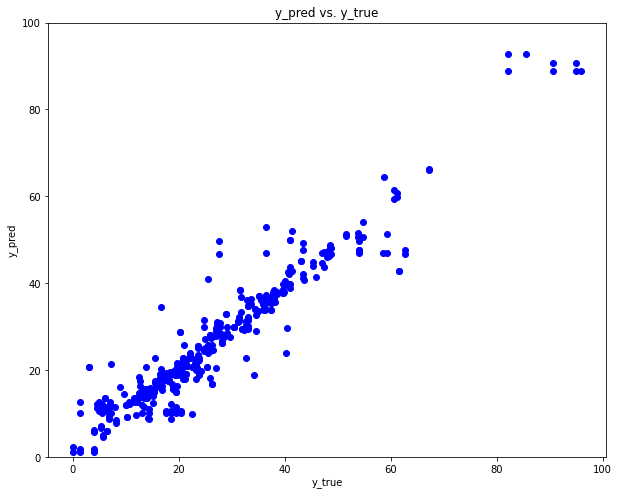

In [70]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

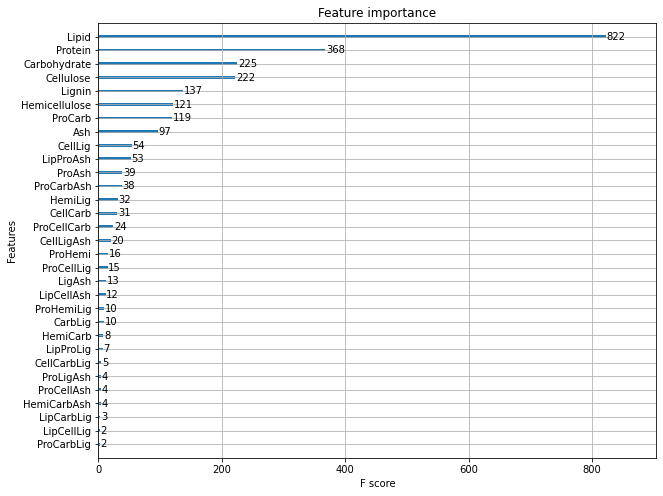

In [71]:
from xgboost import plot_importance
from matplotlib import pyplot as plt

plot_importance(model)
plt.show()

Text(0.5, 1.0, 'y_pred vs. y_true')

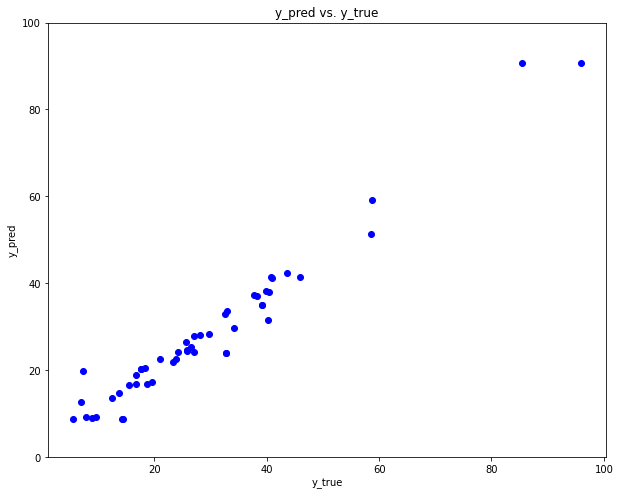

In [72]:
import matplotlib.pyplot as py
py.plot(y_valid, y_valid_predict, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')